# Task 1

## Krunal Dattani 

### Explore Supervised Machine Learning: Simple Linear Regression

### Goal- Predict the percentage of an student based on the no. of study hours.

Data can be found at http://bit.ly/w-data. The dataset contains two variables- Hours indicating the number of hours a student studies and Scores indicating the percentage score he/she received by studying for the corresponding hours

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [13]:
dataset = pd.read_csv('student_scores.csv')
print("Data imported")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
#Using iloc to build our model for testing and training.

Data imported


## Reading the data and getting the info 

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
dataset.shape

(25, 2)

## Checking Null Values (if any)

In [8]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

We conclude that there is no null value present in our dataset

## Plotting the scatter plot 

Text(0.5, 1.0, 'Scatter Plot between No of Hours and Scores')

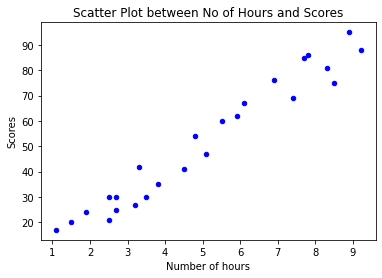

In [9]:
dataset.plot.scatter("Hours","Scores", color="blue")
plt.xlabel("Number of hours")
plt.ylabel("Scores")
plt.title("Scatter Plot between No of Hours and Scores")

Text(0, 0.5, 'Percentage Score')

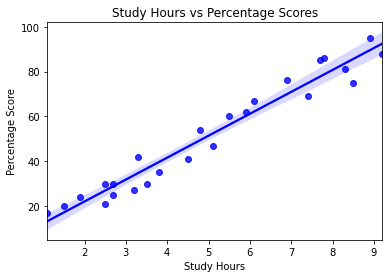

In [12]:
import seaborn as sns
sns.regplot(x=dataset['Hours'],y=dataset['Scores'],color='blue')
plt.title('Hours vs  Scores')
plt.xlabel('Hours')
plt.ylabel('Score')

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

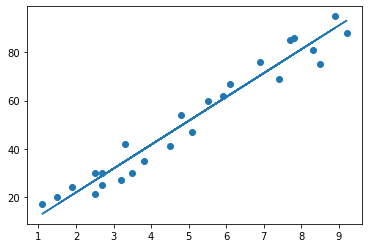

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Visualising the Training set results

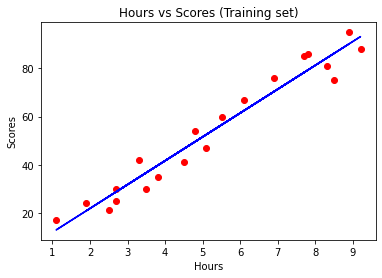

In [20]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Visualising the Test set results

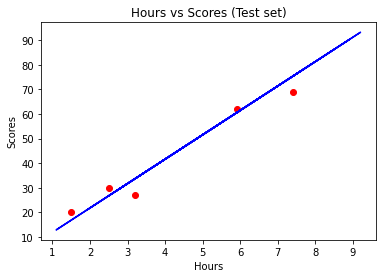

In [21]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


Thus we conclude that our model is 94.54% Accurate!

### Thank You 